**Perform all data preprocessing tasks and feature selection on “Exercise-CarData.csv”**

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer 
import math
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datasets = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML-Lab/L02/Exercise-CarData.csv') 
print("\nData :\n",datasets)


Data :
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]


In [ ]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


In [ ]:
datasets.drop( datasets.columns[[0]], axis=1, inplace=True )

datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   object 
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 112.3+ KB


# Handling Missing Values

In [ ]:
# Removing the row with all null values

datasets.dropna(how='all',inplace=True)
print("\nNew Data :",datasets)


New Data :       Price   Age     KM FuelType  ... Automatic    CC  Doors  Weight
0     13500  23.0  46986   Diesel  ...         0  2000  three    1165
1     13750  23.0  72937   Diesel  ...         0  2000      3    1165
2     13950  24.0  41711   Diesel  ...         0  2000      3    1165
3     14950  26.0  48000   Diesel  ...         0  2000      3    1165
4     13750  30.0  38500   Diesel  ...         0  2000      3    1170
...     ...   ...    ...      ...  ...       ...   ...    ...     ...
1431   7500   NaN  20544   Petrol  ...         0  1300      3    1025
1432  10845  72.0     ??   Petrol  ...         0  1300      3    1015
1433   8500   NaN  17016   Petrol  ...         0  1300      3    1015
1434   7250  70.0     ??      NaN  ...         0  1300      3    1015
1435   6950  76.0      1   Petrol  ...         0  1600      5    1114

[1436 rows x 10 columns]


In [ ]:
# All rows and columns except first
X = datasets.iloc[:, 1:].values 
  
# Only first column 
Y = datasets.iloc[:, 0].values 

print("\nInput :- \n", X)
print("\nOutput :- \n", Y)


Input :- 
 [[23.0 '46986' 'Diesel' ... 2000 'three' 1165]
 [23.0 '72937' 'Diesel' ... 2000 '3' 1165]
 [24.0 '41711' 'Diesel' ... 2000 '3' 1165]
 ...
 [nan '17016' 'Petrol' ... 1300 '3' 1015]
 [70.0 '??' nan ... 1300 '3' 1015]
 [76.0 '1' 'Petrol' ... 1600 '5' 1114]]

Output :- 
 [13500 13750 13950 ...  8500  7250  6950]


In [ ]:
# Handling string value in numeric column

for i in range(len(X)):
  if X[i,-2] == 'three':
    X[i,-2] = '3'
  if X[i,-2] == 'four':
    X[i,-2] = '4'
  if X[i,-2] == 'five':
    X[i,-2] = '5'
X

array([[23.0, 46986.0, 'Diesel', ..., 2000, '3', 1165],
       [23.0, 72937.0, 'Diesel', ..., 2000, '3', 1165],
       [24.0, 41711.0, 'Diesel', ..., 2000, '3', 1165],
       ...,
       [nan, 17016.0, 'Petrol', ..., 1300, '3', 1015],
       [70.0, nan, nan, ..., 1300, '3', 1015],
       [76.0, 1.0, 'Petrol', ..., 1600, '5', 1114]], dtype=object)

In [ ]:
# Replacing '???' string values with nan

for i in range( len(X) ):
  for j in range( len(X[0]) ):
    if isinstance( X[i,j], str) and X[i,j].startswith('?'):
      X[i,j] = math.nan
  
X

array([[23.0, 46986.0, 'Diesel', ..., 2000, '3', 1165],
       [23.0, 72937.0, 'Diesel', ..., 2000, '3', 1165],
       [24.0, 41711.0, 'Diesel', ..., 2000, '3', 1165],
       ...,
       [nan, 17016.0, 'Petrol', ..., 1300, '3', 1015],
       [70.0, nan, nan, ..., 1300, '3', 1015],
       [76.0, 1.0, 'Petrol', ..., 1600, '5', 1114]], dtype=object)

In [ ]:
#Converting string to numeric datatype  

X[:,1] = X[ :, 1 ].astype('float64')
X[:,3] = X[ :, 3 ].astype('float64')
X[:,-2] = X[ :, -2 ].astype('float64')

X[0:5]

array([[23.0, 46986.0, 'Diesel', 90.0, 1.0, 0, 2000, 3.0, 1165],
       [23.0, 72937.0, 'Diesel', 90.0, 1.0, 0, 2000, 3.0, 1165],
       [24.0, 41711.0, 'Diesel', 90.0, nan, 0, 2000, 3.0, 1165],
       [26.0, 48000.0, 'Diesel', 90.0, 0.0, 0, 2000, 3.0, 1165],
       [30.0, 38500.0, 'Diesel', 90.0, 0.0, 0, 2000, 3.0, 1170]],
      dtype=object)

In [ ]:
# Imputation

X_new = X
Y_new = Y_new.reshape(-1,1)

imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")

imputer = imputer.fit(X_new[ :, 0:2 ]) 
X_new[:, 0:2] = imputer.transform(X_new[:, 0:2])

imputer = imputer.fit(X_new[ :, 3: ]) 
X_new[:, 3:] = imputer.transform(X_new[:, 3:])

imputer = imputer.fit(Y_new) 
Y_new = imputer.transform(Y_new)

imputer = SimpleImputer(missing_values = np.nan,strategy = "most_frequent")

imputer = imputer.fit(X_new[ :, 2 ].reshape(-1,1)) 
X_new[:, 2] = imputer.transform(X_new[:, 2].reshape(-1,1)).reshape(1,-1)

print( "\nX_new :- \n", X_new )
print( "\nY_new :- \n", Y_new )


X_new :- 
 [[23.0 46986.0 'Diesel' ... 2000.0 3.0 1165.0]
 [23.0 72937.0 'Diesel' ... 2000.0 3.0 1165.0]
 [24.0 41711.0 'Diesel' ... 2000.0 3.0 1165.0]
 ...
 [55.67215568862275 17016.0 'Petrol' ... 1300.0 3.0 1015.0]
 [70.0 68647.23997185081 'Petrol' ... 1300.0 3.0 1015.0]
 [76.0 1.0 'Petrol' ... 1600.0 5.0 1114.0]]

Y_new :- 
 [[13500.]
 [13750.]
 [13950.]
 ...
 [ 8500.]
 [ 7250.]
 [ 6950.]]


# Handling Categorical Data

In [ ]:
le = LabelEncoder()
X_new[ : ,2] = le.fit_transform(X[ : ,2])
print("\n\nInput : \n", X_new) 



Input : 
 [[23.0 46986.0 1 ... 2000.0 3.0 1165.0]
 [23.0 72937.0 1 ... 2000.0 3.0 1165.0]
 [24.0 41711.0 1 ... 2000.0 3.0 1165.0]
 ...
 [55.67215568862275 17016.0 2 ... 1300.0 3.0 1015.0]
 [70.0 68647.23997185081 2 ... 1300.0 3.0 1015.0]
 [76.0 1.0 2 ... 1600.0 5.0 1114.0]]


In [ ]:
ds = datasets

dummy = pd.get_dummies(ds['FuelType'])
print("\n\nDummy :\n",dummy)

f_arr = np.array(dummy)

f_arr



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       0
1435    0       0       1

[1436 rows x 3 columns]


array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [ ]:
t_arr = np.zeros( ( len(X), len(X[0])-1+len(f_arr[0]) ) )

t_arr[:,0:2] = X_new[:,0:2]
t_arr[:,2:5] = f_arr
t_arr[:,5:] = X_new[:,3:]

#t_arr = np.around( t_arr, decimals=2 )

X_new = t_arr.astype(int)

X_new

array([[   23, 46986,     0, ...,  2000,     3,  1165],
       [   23, 72937,     0, ...,  2000,     3,  1165],
       [   24, 41711,     0, ...,  2000,     3,  1165],
       ...,
       [   55, 17016,     0, ...,  1300,     3,  1015],
       [   70, 68647,     0, ...,  1300,     3,  1015],
       [   76,     1,     0, ...,  1600,     5,  1114]])

# Data Transformation

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[0.27848101 0.19335471 0.         ... 1.         0.33333333 0.26829268]
 [0.27848101 0.30014938 0.         ... 1.         0.33333333 0.26829268]
 [0.29113924 0.1716468  0.         ... 1.         0.33333333 0.26829268]
 ...
 [0.6835443  0.07002086 0.         ... 0.         0.33333333 0.02439024]
 [0.87341772 0.28249499 0.         ... 0.         0.33333333 0.02439024]
 [0.94936709 0.         0.         ... 0.42857143 1.         0.18536585]]


# Feature Selection

In [ ]:
tds = datasets

tds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   object 
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 123.4+ KB


In [ ]:
tds.drop( ['FuelType'], axis=1, inplace=True)
 
tds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   object 
 3   HP         1436 non-null   object 
 4   MetColor   1286 non-null   float64
 5   Automatic  1436 non-null   int64  
 6   CC         1436 non-null   int64  
 7   Doors      1436 non-null   object 
 8   Weight     1436 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 112.2+ KB


In [ ]:
corr = tds.corr()
corr

,Price,Age,MetColor,Automatic,CC,Weight
Price,1.000000,-0.878407,0.112041,0.033081,0.165067,0.581198
Age,-0.878407,1.000000,-0.099659,0.032573,-0.120706,-0.464299
MetColor,0.112041,-0.099659,1.000000,-0.013973,0.029189,0.057142
Automatic,0.033081,0.032573,-0.013973,1.000000,-0.069321,0.057249
CC,0.165067,-0.120706,0.029189,-0.069321,1.000000,0.651450
Weight,0.581198,-0.464299,0.057142,0.057249,0.651450,1.000000


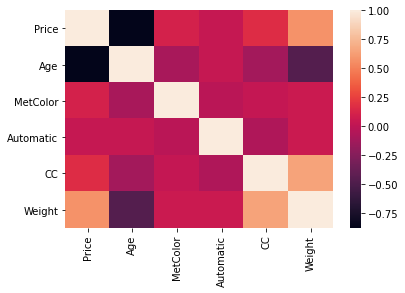

In [ ]:
sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [ ]:
columns = np.insert( columns, 2, True )
columns = np.insert( columns, 3, True )
columns = np.insert( columns, 7, True )

columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
selected_columns = tds.columns[columns]
selected_columns.shape

(9,)

In [ ]:
tds = tds[selected_columns]
print(tds)

      Price   Age     KM   HP  MetColor  Automatic    CC  Doors  Weight
0     13500  23.0  46986   90       1.0          0  2000  three    1165
1     13750  23.0  72937   90       1.0          0  2000      3    1165
2     13950  24.0  41711   90       NaN          0  2000      3    1165
3     14950  26.0  48000   90       0.0          0  2000      3    1165
4     13750  30.0  38500   90       0.0          0  2000      3    1170
...     ...   ...    ...  ...       ...        ...   ...    ...     ...
1431   7500   NaN  20544   86       1.0          0  1300      3    1025
1432  10845  72.0     ??   86       0.0          0  1300      3    1015
1433   8500   NaN  17016   86       0.0          0  1300      3    1015
1434   7250  70.0     ??   86       1.0          0  1300      3    1015
1435   6950  76.0      1  110       0.0          0  1600      5    1114

[1436 rows x 9 columns]
